In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
seoul_df = pd.read_csv('data-files/seoul_apt.csv')

In [4]:
seoul_df.head(3)

,NO,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),건축년도
0,1,서울특별시 동대문구 이문동,84.972,202212,31,"76,500",2003
1,2,서울특별시 동작구 신대방동,84.940,202212,31,"86,500",2001
2,3,서울특별시 영등포구 양평동5가,59.940,202212,31,"77,000",1996


In [5]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12807 entries, 0 to 12806
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        12807 non-null  int64  
 1   시군구       12807 non-null  object 
 2   전용면적(㎡)   12807 non-null  float64
 3   계약년월      12807 non-null  int64  
 4   계약일       12807 non-null  int64  
 5   거래금액(만원)  12807 non-null  object 
 6   건축년도      12807 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 700.5+ KB


In [6]:
# 거래금액의 dtype을 object -> int
seoul_df["거래금액(만원)"] = seoul_df["거래금액(만원)"].map(lambda v : int(str(v).replace(",","")))
seoul_df["거래금액(만원)"].dtype

dtype('int64')

In [7]:
# 1㎡ 당 거래금액  (기준거래금액)
seoul_df['price_ratio'] = seoul_df['거래금액(만원)'] / seoul_df['전용면적(㎡)']
print(type('price_ratio'))

<class 'str'>


In [8]:
print(seoul_df['price_ratio'].mean())   # 기준거래금액 평균
print(seoul_df['price_ratio'].max())    # 기준거래금액 최고가
print(seoul_df['price_ratio'].min())    # 기준거래금액 최저가

print(seoul_df['price_ratio'].quantile(0.25))   # 기준거래금액 25%   
print(seoul_df['price_ratio'].quantile(0.5))    # 기준거래금액 50%
print(seoul_df['price_ratio'].quantile(0.75))   # 기준거래금액 75%

1369.115907349985
5579.617834394904
226.78074425316976
898.4860986314625
1177.6540150641576
1601.067378252168


In [9]:
# # 구 별 새로운 데이터프레임 생성
# nowon_df = seoul_df[seoul_df['시군구'].str.contains('노원구')]
# jongno_df = seoul_df[seoul_df['시군구'].str.contains('종로구')]
# jung_df = seoul_df[seoul_df['시군구'].str.contains('중구')]
# yongsan_df = seoul_df[seoul_df['시군구'].str.contains('용산구')]
# seongdong_df = seoul_df[seoul_df['시군구'].str.contains('성동구')]
# gwangjin_df = seoul_df[seoul_df['시군구'].str.contains('광진구')]
# dongdaemun_df = seoul_df[seoul_df['시군구'].str.contains('동대문구')]
# jungnang_df = seoul_df[seoul_df['시군구'].str.contains('중랑구')]
# seongbuk_df = seoul_df[seoul_df['시군구'].str.contains('성북구')]
# gangbuk_df = seoul_df[seoul_df['시군구'].str.contains('강북구')]
# dobong_df = seoul_df[seoul_df['시군구'].str.contains('도봉구')]
# eunpyeong_df = seoul_df[seoul_df['시군구'].str.contains('은평구')]
# seodaemun_df = seoul_df[seoul_df['시군구'].str.contains('서대문구')]
# mapo_df = seoul_df[seoul_df['시군구'].str.contains('마포구')]
# yangcheon_df = seoul_df[seoul_df['시군구'].str.contains('양천구')]
# gangseo_df = seoul_df[seoul_df['시군구'].str.contains('강서구')]
# guro_df = seoul_df[seoul_df['시군구'].str.contains('구로구')]
# geumcheon_df = seoul_df[seoul_df['시군구'].str.contains('금천구')]
# yeongdeungpo_df = seoul_df[seoul_df['시군구'].str.contains('영등포구')]
# dongjak_df = seoul_df[seoul_df['시군구'].str.contains('동작구')]
# gwanak_df = seoul_df[seoul_df['시군구'].str.contains('관악구')]
# seocho_df = seoul_df[seoul_df['시군구'].str.contains('서초구')]
# gangnam_df = seoul_df[seoul_df['시군구'].str.contains('강남구')]
# songpa_df = seoul_df[seoul_df['시군구'].str.contains('송파구')]
# gangdong_df = seoul_df[seoul_df['시군구'].str.contains('강동구')]

In [10]:
print( seoul_df.columns )
print( seoul_df.shape )

Index(['NO', '시군구', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '건축년도',
       'price_ratio'],
      dtype='object')
(12807, 8)


In [11]:
seoul_df['구'] = seoul_df['시군구'].map(lambda v: v.split()[1])

In [12]:
gu_names = seoul_df['구'].drop_duplicates().values

In [13]:
gu_names

array(['동대문구', '동작구', '영등포구', '종로구', '양천구', '중랑구', '성북구', '송파구', '노원구',
       '구로구', '강서구', '강남구', '서초구', '도봉구', '강북구', '성동구', '용산구', '서대문구',
       '관악구', '은평구', '강동구', '마포구', '광진구', '중구', '금천구'], dtype=object)

In [14]:
gu_mean = seoul_df.groupby('구')["price_ratio"].mean()
gu_mean

구
강남구     2319.661130
강동구     1324.007920
강북구      942.362287
강서구     1035.471068
관악구     1045.121862
광진구     1424.976143
구로구      881.571623
금천구     1014.928440
노원구     1116.919153
도봉구      890.353734
동대문구    1109.253428
동작구     1421.556736
마포구     1569.330819
서대문구    1217.726295
서초구     2331.882458
성동구     1841.307405
성북구     1128.800410
송파구     1964.137905
양천구     1311.634950
영등포구    1220.885666
용산구     1986.455524
은평구     1015.980834
종로구     1174.337584
중구      1213.159451
중랑구      994.503679
Name: price_ratio, dtype: float64

In [15]:
# # 각 구별 기준거래금액의 평균
# print('서울 평균:', seoul_df['price_ratio'].mean()) 
# print('노원구 평균:', nowon_df['price_ratio'].mean())
# print('종로구 평균:', jongno_df['price_ratio'].mean())
# print('중구 평균:', jung_df['price_ratio'].mean())
# print('용산구 평균:', yongsan_df['price_ratio'].mean())
# print('성동구 평균:', seongdong_df['price_ratio'].mean())
# print('광진구 평균:', gwangjin_df['price_ratio'].mean())
# print('동대문구 평균:', dongdaemun_df['price_ratio'].mean())
# print('중랑구 평균:', jungnang_df['price_ratio'].mean())
# print('성북구 평균:', seongbuk_df['price_ratio'].mean())
# print('강북구 평균:', gangbuk_df['price_ratio'].mean())
# print('도봉구 평균:', dobong_df['price_ratio'].mean())
# print('은평구 평균:', eunpyeong_df['price_ratio'].mean())
# print('서대문구 평균:', seodaemun_df['price_ratio'].mean())
# print('마포구 평균:', mapo_df['price_ratio'].mean())
# print('양천구 평균:', yangcheon_df['price_ratio'].mean())
# print('강서구 평균:', gangseo_df['price_ratio'].mean())
# print('구로구 평균:', guro_df['price_ratio'].mean())
# print('금천구 평균:', geumcheon_df['price_ratio'].mean())
# print('영등포구 평균:', yeongdeungpo_df['price_ratio'].mean())
# print('동작구 평균:', dongjak_df['price_ratio'].mean())
# print('관악구 평균:', gwanak_df['price_ratio'].mean())
# print('서초구 평균:', seocho_df['price_ratio'].mean())
# print('강남구 평균:', gangnam_df['price_ratio'].mean())
# print('송파구 평균:', songpa_df['price_ratio'].mean())
# print('강동구 평균:', gangdong_df['price_ratio'].mean())

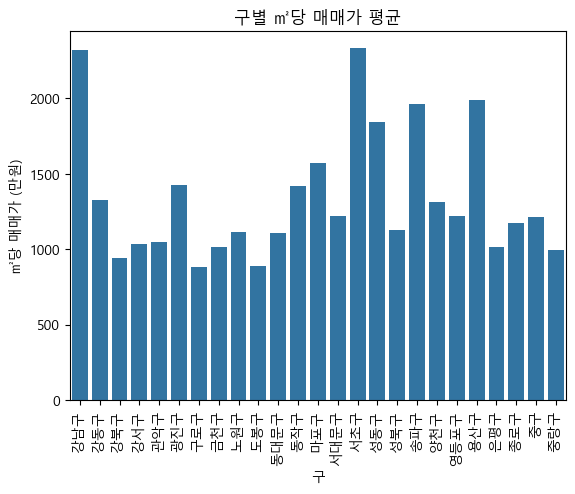

In [19]:
# 한글 패치
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# barplot
# sns.barplot( x = gu_names, y = gu_mean)
sns.barplot( x = gu_mean.index, y = gu_mean)
plt.xticks(rotation=90)
plt.title('구별 ㎡당 매매가 평균')
plt.xlabel('구')
plt.ylabel('㎡당 매매가 (만원)')
plt.show()

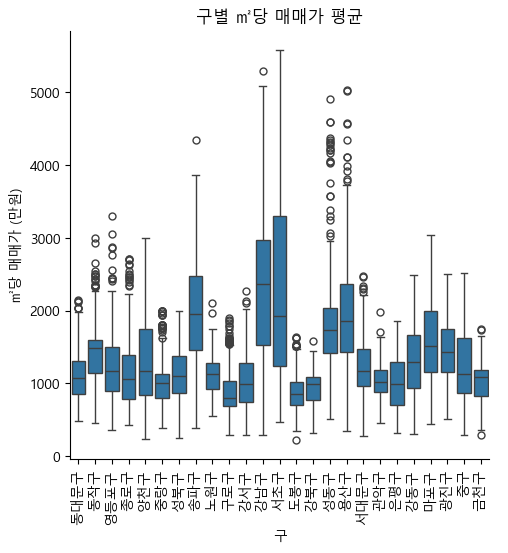

In [17]:
# boxplot
sns.catplot( x = '구', y = "price_ratio", kind = 'box', data = seoul_df)
plt.xticks(rotation=90)
plt.title('구별 ㎡당 매매가 평균')
plt.xlabel('구')
plt.ylabel('㎡당 매매가 (만원)')
plt.show()